# Importing the data

In [17]:
# Importing the required libraries

import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Importing data from '.xls' to DataFrame

df= pd.read_csv(r'C:\Users\harita\Mypython\Machine learning\Imarticus Final Capston\framingham_heart_disease.xls',index_col=None,header=0,sep=',')

df.head()


male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

# Explatory Data Analysis

In [19]:
# Explatory data analysis using pandas profiling

from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")

In [20]:
# Displaying the report
profile

In [21]:
# Saving the report to '.html' file

profile.to_file('Exploratory_Data_Analysis.html')

In [22]:
# Performing exploratory data analysis
# Checking for size and datatypes of our data
print(df.dtypes)
print(df.shape)
print(df.info())
print(df[:].describe())

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object
(4238, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     

In [23]:
# Checking for null values

df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [24]:
# Looking at the data, 'education' does not affect the risk of heart disease. So 'education' has been dropped.

df= df.drop("education",axis=1)

In [25]:
# Rechecking for dropped columns and null values

df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [26]:
# We have missing values in the following columns:
#  cigsPerDay (29)
#  BPMeds     (53)
#  totChol    (50)
#  BMI        (19)
#  glucose    (01)
#  heartRate  (388)

# So instead of deleting those null records, we are replacing the null values with 'mean()' values.

for value in ['cigsPerDay', 'BPMeds', 'totChol','BMI','glucose','heartRate']:
    df[value].fillna(round(df[value].mean()), inplace= True)#0.852987
    
#for value in ['cigsPerDay', 'BPMeds', 'totChol','BMI','glucose','heartRate']:
    #df[value].fillna(round(df[value].median()), inplace= True) #0.85220

In [27]:
# Rechecking for null values. 

df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [28]:
# Checking for the size of our dataFrame
df.shape

(4238, 15)

In [29]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

After Performing the Explatory Data Analysis we came to the following conclusion:
1. We had missing/null values in our data. We used 'mean' value as substitution and manipulated the null values.
2. We analysed the data we have and came to a conclusion that 'Education' does not affect heart risk markers. Hence we dropped that column.
3. The categorical data we have is already converted to numerical. Every column we have is in 'int' and 'float' datatype.
4. So it is clear that there is no more missing data.

For further analysis, we will be:
1. Checking for outliers.
2. Check for skewness in our data.
3. check the relation between our variables.

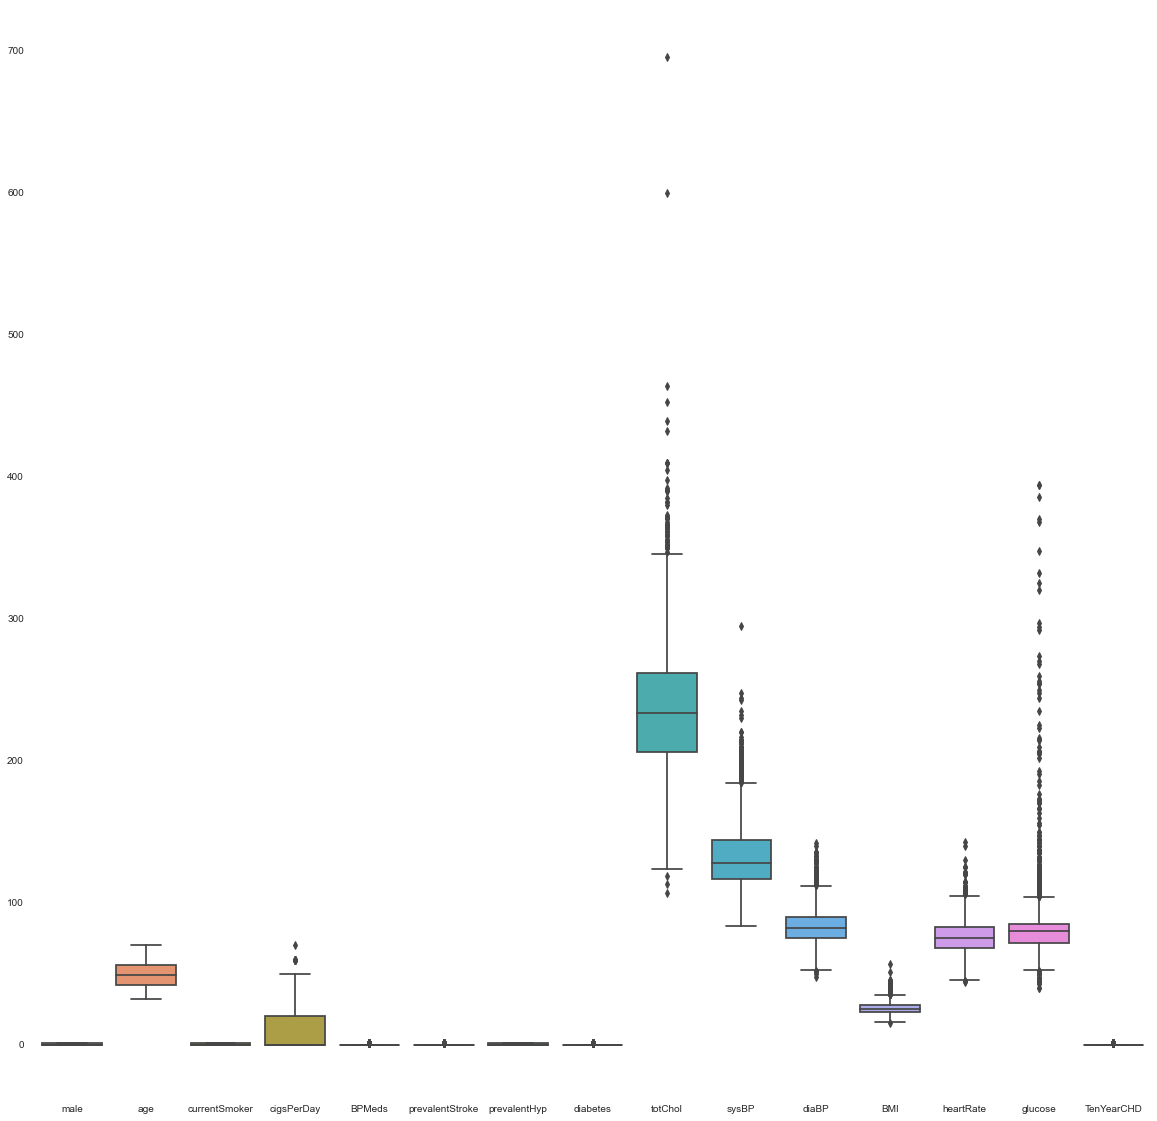

In [30]:
# ANALYSIS NO 1

# Checking for outliers in our data.
# Ideally there should not be any outliers in the data

plt.figure(figsize=(20,20), facecolor='w')
sns.boxplot(data=df)
plt.show()


From the generated boxplot we can conclude:
1. We have outliers in the following columns:
   a) cigsPerDay
   b) totChol
   c) sysBP
   d) diaBP
   d) BMI
   e) heartRate
   f) glucose
2. Out of them we have extremities in 'totChol' and 'sysBP' the rest of the outliers are close to the upper whisker which are considerable.
3. As the assumption states that there should be no outliers in our data. We will try to manipulate the data to fit in our range.

In [31]:
# Finding the maximum values for 'totChol' and 'sysBP'

print(df['totChol'].max())
print(df['sysBP'].max())

696.0
295.0


In [32]:
# Here we are manipulating the data to fit in range.

df = df[df['totChol']<600.0]
df = df[df['sysBP']<295.0]
df.shape

(4235, 15)

In [33]:
# Splitting our data to 'X' and 'Y' variables
# X --> Contains all the independant variables.
# Y --> Contains the dependant varibale which we are going to predict.

X= df[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']] 

Y= df['TenYearCHD'] 

In [34]:
# Checking whether data is properly split.
#x
#y

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CA3C32B88>,
      dtype=object)

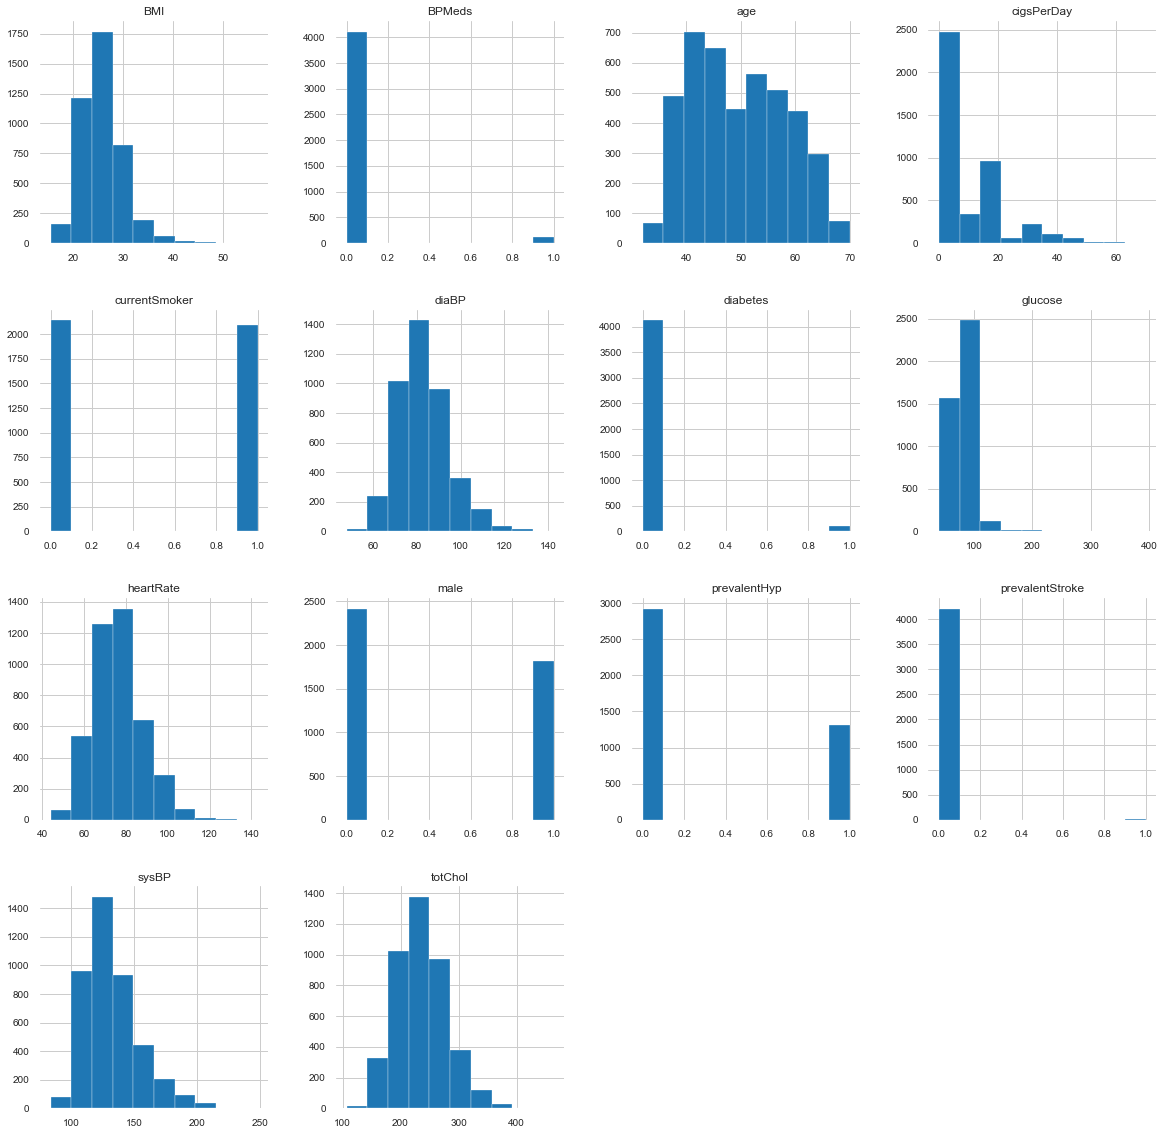

In [35]:
# ANALYSIS NO 2

# We are plotting a histogram to check for skewness in our independent variables.
# Ideally the data should follow an approximate normal distribution

X.hist(figsize=(20,20))

From observing the above histogram we can conclude:
1. The columns: 'male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes' are categorical variables with value ranges in 0 and 1. 
2. The columns: 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose' are numerical variables.
3. We check for skewness in the numerical/continious variables.
4. We can see all the columns except 'cigsPerDay' and 'sysBP' are normally skewed.
5. 'cigsPerDay' and 'sysBP' are slightly right skewed.
6. We can see 'cigsPerDay' has most data as zeroes.

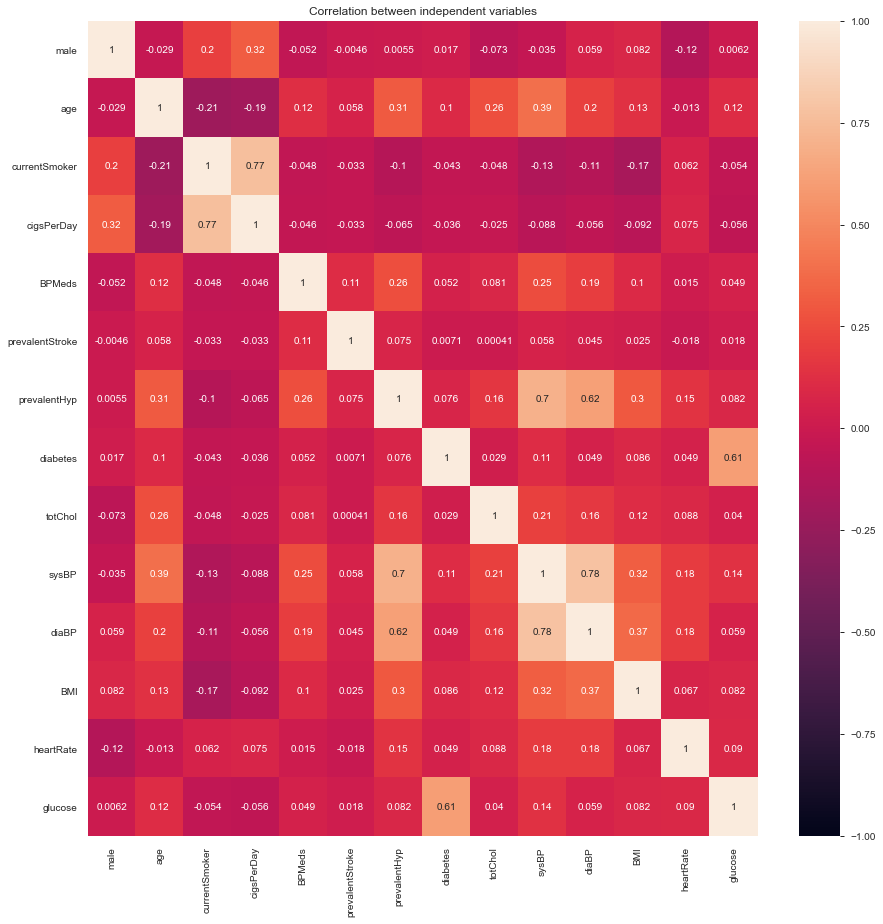

In [36]:


# ANALYSIS NO 3

# Check for relation between our variables.
# Ideally there should not be multi-collinearity on our data. That means our X variables should'nt be 
#  dependant on eachother.

# We are plotting a heatmap to check for the same.

corr_df=X.corr(method="pearson")
#print(corr_df)

plt.figure(figsize=(15,15))
plt.title("Correlation between independent variables")
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)



From observing the above heatmap we can conclude:
1. Variables 'currentSmoker' and 'cigsPerDay' are highly correlated.
2. Variables 'sysBP' and 'diaBP' are highly correlated.
3. From our histogram we can see that 'cigsPerDay' have more 0 values. Hence we can try and drop that column from our data.
4. Also we know that 'sysBP' and 'diaBP' are supposed to be dependant on eachother,as they help in generating the blood pressure of people. So it is wise not to drop any of those columns.

In [37]:
# Dropping 'cigsPerDay' column from our data.

df=df.drop('cigsPerDay',axis=1)
df.head()

male  age  currentSmoker  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0     1   39              0     0.0                0             0         0   
1     0   46              0     0.0                0             0         0   
2     1   48              1     0.0                0             0         0   
3     0   61              1     0.0                0             1         0   
4     0   46              1     0.0                0             0         0   

   totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
0    195.0  106.0   70.0  26.97       80.0     77.0           0  
1    250.0  121.0   81.0  28.73       95.0     76.0           0  
2    245.0  127.5   80.0  25.34       75.0     70.0           0  
3    225.0  150.0   95.0  28.58       65.0    103.0           1  
4    285.0  130.0   84.0  23.10       85.0     85.0           0

Now that we are done cleaning our data. We can move forward to prediction of data using our classification algorithms:
1. Logistic Regression
2. K Nearest Neighbour
3. Decision Tree
4. Support Vector Machine

# Preprocessing & Scaling the data

In [38]:
# PRE-PROCESSING AND SCALING THE DATA

# It is ideal to scale the data before processing it through a algorithm.
# We are using Standardization technique to scale our data. It means that our values are centered around mean 
#  with a unit standard deviation.


# To scale the data we have to split our data into X and Y variables
# X --> Independant variables
# Y --> Dependant variable

X = df.values[:,0:-1]
Y = df.values[:,-1]

In [39]:
X

array([[  1.  ,  39.  ,   0.  , ...,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   0.  , ...,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,   1.  , ...,  25.34,  75.  ,  70.  ],
       ...,
       [  0.  ,  48.  ,   1.  , ...,  22.  ,  84.  ,  86.  ],
       [  0.  ,  44.  ,   1.  , ...,  19.16,  86.  ,  82.  ],
       [  0.  ,  52.  ,   0.  , ...,  21.47,  80.  , 107.  ]])

In [40]:
Y

array([0., 0., 0., ..., 0., 0., 0.])

In [41]:
# SCALING THE DATA

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

print(X)


[[ 1.15303207 -1.23443875 -0.98849592 ...  0.28780438  0.34353097
  -0.21724855]
 [-0.86727857 -0.41775155 -0.98849592 ...  0.72057843  1.5912614
  -0.26106242]
 [ 1.15303207 -0.18441235  1.01163796 ... -0.1130034  -0.07237917
  -0.52394568]
 ...
 [-0.86727857 -0.18441235  1.01163796 ... -0.93429052  0.67625909
   0.17707634]
 [-0.86727857 -0.65109075  1.01163796 ... -1.63263047  0.84262314
   0.00182084]
 [-0.86727857  0.28226605 -0.98849592 ... -1.06461453  0.34353097
   1.09716775]]


In [42]:
# Checking the data type of our Y variable

Y.dtype

dtype('float64')

In [43]:
# To pass our data through prediction algorithm our data needs to be of type int.
# Our Y variable is of type float.
# Changing data type of Y

Y= Y.astype(int)

# Predictive Modelling

In [44]:
# To run our data through predictive modelling we need to split our data to 'train' and 'test'

from sklearn.model_selection import train_test_split

#Split the data into test and train

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
#                                                    random_state=10)

""" 80-20 IS IDEAL SPLIT FOR TRAINING & TESTING DATA """

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,
                                                    random_state=10)

# Logistic Regression

In [45]:
#Logistic regression

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)

In [46]:
# Generating confusion matrix, accuracy score and classification report to check score of our prediction.

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm_LR=confusion_matrix(Y_test,Y_pred)
print(cfm_LR)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc_LR=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_LR)

[[714   9]
 [114  10]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       723
           1       0.53      0.08      0.14       124

    accuracy                           0.85       847
   macro avg       0.69      0.53      0.53       847
weighted avg       0.81      0.85      0.81       847

Accuracy of the model:  0.8547815820543093


In [47]:
# TUNING THE DATA TO GET BETTER ACCURACY

# Adujusting threshold
# Store the predicted probabilities 

y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.85038981 0.14961019]
 [0.79556973 0.20443027]
 [0.89225704 0.10774296]
 ...
 [0.79718368 0.20281632]
 [0.94987533 0.05012467]
 [0.92327226 0.07672774]]


In [48]:
# Threshold change manually 

y_pred_class=[]                #empty list to append created values

for value in y_pred_prob[:,1]: #only column 1 not 0 from above numbers (class 1)
    if value > 0.40:           #play here with threshold (0.6 to 0.4)
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
        
print(y_pred_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [49]:
#Generating a confusion matrix, classification report and accuracy score to check again.

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm_LRT=confusion_matrix(Y_test,y_pred_class)

print(cfm_LRT)

acc_LRT=accuracy_score(Y_test, y_pred_class)

print("Accuracy of the model: ",acc_LRT)

print(classification_report(Y_test, y_pred_class))

[[699  24]
 [108  16]]
Accuracy of the model:  0.8441558441558441
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       723
           1       0.40      0.13      0.20       124

    accuracy                           0.84       847
   macro avg       0.63      0.55      0.55       847
weighted avg       0.80      0.84      0.81       847



In [50]:
# Using all values to predict Area Under the Curve(AUC)
# We generate this to plot ROC curve.
# Ideally the higher the AUC the better the performance of our model.

from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)

print(auc)

0.707201177887833


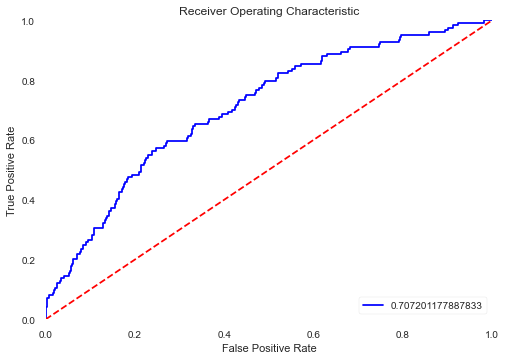

In [51]:
# PLOTTING A ROC CURVE 

import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc) # b is blue line 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') # x column array, y column array,r-- red dash line 
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# Stochastic Gradient Descent Classifier

In [52]:
# USING STOCHASTIC GRADIENT CLASSIFIER

from sklearn.linear_model import SGDClassifier

#create a model
classifier=SGDClassifier(loss="log",random_state=10,eta0=0.00001,alpha=0.01,max_iter=1000)

#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [53]:
# Number of Iterations requried

classifier.n_iter_

11

In [54]:
# No change in errors for 5 consicutive iterations

classifier.n_iter_no_change

5

In [55]:
# Early stopping
# With early_stopping=False, the model is fitted on the entire input data and the stopping 
#  criterion is based on the objective function computed on the training data.

classifier.early_stopping

False

In [56]:
#Generating a confusion matrix, classification report and accuracy score to check again.

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm_SGD=confusion_matrix(Y_test,Y_pred)
print(cfm_SGD)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc_SGD=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_SGD)


[[718   5]
 [115   9]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       723
           1       0.64      0.07      0.13       124

    accuracy                           0.86       847
   macro avg       0.75      0.53      0.53       847
weighted avg       0.83      0.86      0.81       847

Accuracy of the model:  0.8583234946871311


# Support Vector Machine

In [57]:
# SVM  Gamma = 0.1

from sklearn.svm import SVC

svc_model= SVC(kernel="rbf",gamma=0.1,C= 100)
svc_model.fit(X_train,Y_train)
Y_pred= svc_model.predict(X_test)
#print(Y_pred)

acc_SV= svc_model.score(X_train,Y_train)
print("Accuracy of the model: ",acc_SV)

Accuracy of the model:  0.9386068476977568


In [58]:
# SVM Where Gamma = 0.01

from sklearn.svm import SVC

svc_model= SVC(kernel="rbf",gamma=0.01,C= 100)
svc_model.fit(X_train,Y_train)
Y_pred= svc_model.predict(X_test)
#print(Y_pred)

acc_SV1= svc_model.score(X_train,Y_train)
print("Accuracy of the model: ",acc_SV1)


Accuracy of the model:  0.8606847697756789


In [59]:
# SVM Where Gamma = 0.001

from sklearn.svm import SVC

svc_model= SVC(kernel="rbf",gamma=0.001,C= 100)
svc_model.fit(X_train,Y_train)
Y_pred= svc_model.predict(X_test)
#print(Y_pred)

acc_SV1= svc_model.score(X_train,Y_train)
print("Accuracy of the model: ",acc_SV1)

Accuracy of the model:  0.8494687131050768


# K-Nearest Neighbour

In [60]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier

model_KNN= KNeighborsClassifier(n_neighbors= int(np.sqrt(len(X_train))),
                                    metric= 'euclidean')

#fit the model on the data and predict the values

model_KNN.fit(X_train,Y_train)

Y_pred= model_KNN.predict(X_test)

#print(list(zip(Y_test,Y_pred)))

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm_KNN=confusion_matrix(Y_test,Y_pred)
print(cfm_KNN)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc_KNN=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_KNN)

[[723   0]
 [124   0]]

Classification report: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       723
           1       0.00      0.00      0.00       124

    accuracy                           0.85       847
   macro avg       0.43      0.50      0.46       847
weighted avg       0.73      0.85      0.79       847

Accuracy of the model:  0.8536009445100354


C:\Users\harita\Documents\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [62]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

model_DecisionTree= DecisionTreeClassifier(criterion= "gini",random_state=10)

#fit the model on the data and predict the values

model_DecisionTree.fit(X_train,Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [63]:
Y_pred= model_DecisionTree.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm_DT=confusion_matrix(Y_test,Y_pred)
print(cfm_DT)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc_DT=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_DT)

[[600 123]
 [ 97  27]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       723
           1       0.18      0.22      0.20       124

    accuracy                           0.74       847
   macro avg       0.52      0.52      0.52       847
weighted avg       0.76      0.74      0.75       847

Accuracy of the model:  0.7402597402597403


In [65]:
# PRUNING THE DECISION TREE
# play around with the node

from sklearn.tree import DecisionTreeClassifier

model_DecisionTree= DecisionTreeClassifier(criterion= "gini",min_samples_leaf= 3,max_depth=10,random_state=10)

#default-->min_sample_leaf= 1 ,max_depth=none
#fit the model on the data and predict the values

model_DecisionTree.fit(X_train,Y_train)

Y_pred= model_DecisionTree.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm_DT1=confusion_matrix(Y_test,Y_pred)
print(cfm_DT1)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc_DT1=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_DT1)

[[672  51]
 [ 98  26]]
Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       723
           1       0.34      0.21      0.26       124

    accuracy                           0.82       847
   macro avg       0.61      0.57      0.58       847
weighted avg       0.79      0.82      0.81       847

Accuracy of the model:  0.8240850059031877


# Random Forrest

In [67]:
# Predicting using the Random forest

from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(n_estimators=101, random_state=10)

#for the model on the data and predict the values

model= model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm_RF=confusion_matrix(Y_test,Y_pred)
print(cfm_RF)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc_RF=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_RF)

[[711  12]
 [112  12]]

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       723
           1       0.50      0.10      0.16       124

    accuracy                           0.85       847
   macro avg       0.68      0.54      0.54       847
weighted avg       0.81      0.85      0.81       847

Accuracy of the model:  0.8536009445100354


# Accuracy of the Models

In [69]:
# Evaluating Models

model_eval = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','SGD',
                                   'SVM','Decision Tree','Random Forrest'], 
                         'Accuracy': [acc_LR*100, acc_KNN*100, 
                                      acc_SGD*100,acc_SV*100,acc_DT*100,acc_RF*100]})
model_eval

Model   Accuracy
0  Logistic Regression  85.478158
1  K-Nearest Neighbour  85.360094
2                  SGD  85.832349
3                  SVM  93.860685
4        Decision Tree  74.025974
5       Random Forrest  85.360094

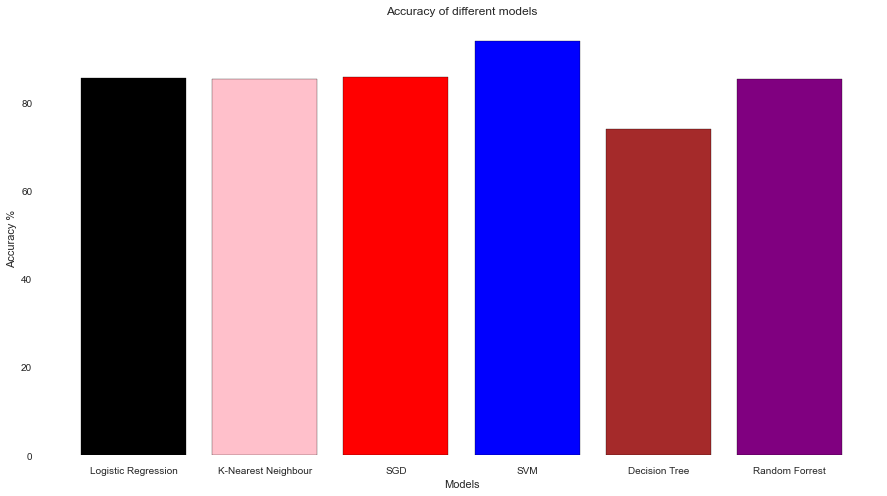

In [72]:
colors = ['Black','pink','red','Blue','Brown','purple']
plt.figure(figsize=(15,8), facecolor='w')
plt.title("Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_eval['Model'],model_eval['Accuracy'],color=colors,edgecolor='black')
plt.show()